In [1]:
import pandas as pd

In [2]:
 df = pd.read_csv('/content/census.csv')
 df2 = pd.read_csv('/content/pres_votes_2012_2020.csv')

In [3]:
df.head()


,county_fips,state,county,stname,ctyname,year,age20_34,age35_49,age50plus,total_population,male,female,total_black,total_white,total_hisp
0,1001,1,1,Alabama,Autauga County,2012,10060,12366,17000,39426,18919,20507,6812,31640,808
1,1001,1,1,Alabama,Autauga County,2016,10279,11340,18549,40168,19215,20953,7387,31685,918
2,1001,1,1,Alabama,Autauga County,2020,10510,11142,19965,41617,19761,21856,8104,32297,1057
3,1003,1,3,Alabama,Baldwin County,2012,31483,36845,71336,139664,67374,72290,11925,124314,5036
4,1003,1,3,Alabama,Baldwin County,2016,34151,38257,81268,153676,73973,79703,13299,136161,5406


In [4]:
df2.head()

,year,state,county_name,county_fips,totalvotes,share_repub,share_democ,repub,democ
0,2012,ALABAMA,AUTAUGA,1001,23932.0,0.726183,0.265878,17379,6363
1,2016,ALABAMA,AUTAUGA,1001,24973.0,0.727666,0.237697,18172,5936
2,2020,ALABAMA,AUTAUGA,1001,27770.0,0.714368,0.270184,19838,7503
3,2012,ALABAMA,BALDWIN,1003,85338.0,0.773583,0.215894,66016,18424
4,2016,ALABAMA,BALDWIN,1003,95215.0,0.765457,0.193856,72883,18458


In [5]:
# merge the two datasets on country_fips
df_merged = pd.merge(df, df2, on='county_fips')

In [6]:
df_merged.head()

,county_fips,state_x,county,stname,ctyname,year_x,age20_34,age35_49,age50plus,total_population,...,total_white,total_hisp,year_y,state_y,county_name,totalvotes,share_repub,share_democ,repub,democ
0,1001,1,1,Alabama,Autauga County,2012,10060,12366,17000,39426,...,31640,808,2012,ALABAMA,AUTAUGA,23932.0,0.726183,0.265878,17379,6363
1,1001,1,1,Alabama,Autauga County,2012,10060,12366,17000,39426,...,31640,808,2016,ALABAMA,AUTAUGA,24973.0,0.727666,0.237697,18172,5936
2,1001,1,1,Alabama,Autauga County,2012,10060,12366,17000,39426,...,31640,808,2020,ALABAMA,AUTAUGA,27770.0,0.714368,0.270184,19838,7503
3,1001,1,1,Alabama,Autauga County,2016,10279,11340,18549,40168,...,31685,918,2012,ALABAMA,AUTAUGA,23932.0,0.726183,0.265878,17379,6363
4,1001,1,1,Alabama,Autauga County,2016,10279,11340,18549,40168,...,31685,918,2016,ALABAMA,AUTAUGA,24973.0,0.727666,0.237697,18172,5936


In [7]:
# give me info
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28023 entries, 0 to 28022
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   county_fips       28023 non-null  int64  
 1   state_x           28023 non-null  int64  
 2   county            28023 non-null  int64  
 3   stname            28023 non-null  object 
 4   ctyname           28023 non-null  object 
 5   year_x            28023 non-null  int64  
 6   age20_34          28023 non-null  int64  
 7   age35_49          28023 non-null  int64  
 8   age50plus         28023 non-null  int64  
 9   total_population  28023 non-null  int64  
 10  male              28023 non-null  int64  
 11  female            28023 non-null  int64  
 12  total_black       28023 non-null  int64  
 13  total_white       28023 non-null  int64  
 14  total_hisp        28023 non-null  int64  
 15  year_y            28023 non-null  int64  
 16  state_y           28023 non-null  object

In [8]:
# generate new versions on county demographic variables that are in fractions

# generate a variable repub	on total_population ratio
df_merged['republican_percentage'] = df_merged['repub'] / df_merged['total_population']
df_merged['republican_percentage'].unique()



array([0.44080049, 0.46091412, 0.5031705 , ..., 0.52260096, 0.56187477,
       0.57558355])

In [9]:
# generate a variable democrat	on total_population ratio
df_merged['democrat_percentage'] = df_merged['democ'] / df_merged['total_population']
df_merged['democrat_percentage'].unique()

array([0.16139096, 0.15056054, 0.19030589, ..., 0.0781771 , 0.05539089,
       0.06669137])

In [10]:
# Describe share_repub, republican_percentage, democrat_percentage
df_merged[['share_repub', 'republican_percentage', 'democrat_percentage']].describe()


,share_repub,republican_percentage,democrat_percentage
count,28020.000000,28023.000000,28023.000000
mean,0.626054,0.382423,0.211576
std,0.157090,0.118206,0.108112
min,0.040875,0.010079,0.014199
25%,0.531181,0.307429,0.129286
50%,0.649774,0.380511,0.190364
75%,0.744761,0.456775,0.275126
max,0.961818,1.651989,0.946733


In [11]:
# How has the average Republican vote share change from 2012 to 2020?
df_merged.groupby('year_y')['share_repub'].mean()

,share_repub
year_y,
2012,0.595769
2016,0.632379
2020,0.650028


There has been an increase in the share of republican votes each election.


Create some scatter plots with share_repub on the 𝑌-axis and the dif- ferent demographic share variables on the 𝑋-axis. What patterns do you notice? Are there any changes in these relationships over years? Hint: Use the Graphics GUI, ”Graphics → Twoway graph → Create...→ Basic Plots... → Scatter”. Also try the by option to output separate figures by year.

In [12]:
df.columns

Index(['county_fips', 'state', 'county', 'stname', 'ctyname', 'year',
       'age20_34', 'age35_49', 'age50plus', 'total_population', 'male',
       'female', 'total_black', 'total_white', 'total_hisp'],
      dtype='object')

In [13]:
# create a share black variable and a share female variable
df_merged['share_black'] = df_merged['total_black'] / df_merged['total_population']
df_merged['share_female'] = df_merged['female'] / df_merged['total_population']

In [14]:
df_merged.head()

,county_fips,state_x,county,stname,ctyname,year_x,age20_34,age35_49,age50plus,total_population,...,county_name,totalvotes,share_repub,share_democ,repub,democ,republican_percentage,democrat_percentage,share_black,share_female
0,1001,1,1,Alabama,Autauga County,2012,10060,12366,17000,39426,...,AUTAUGA,23932.0,0.726183,0.265878,17379,6363,0.440800,0.161391,0.172779,0.520139
1,1001,1,1,Alabama,Autauga County,2012,10060,12366,17000,39426,...,AUTAUGA,24973.0,0.727666,0.237697,18172,5936,0.460914,0.150561,0.172779,0.520139
2,1001,1,1,Alabama,Autauga County,2012,10060,12366,17000,39426,...,AUTAUGA,27770.0,0.714368,0.270184,19838,7503,0.503170,0.190306,0.172779,0.520139
3,1001,1,1,Alabama,Autauga County,2016,10279,11340,18549,40168,...,AUTAUGA,23932.0,0.726183,0.265878,17379,6363,0.432658,0.158410,0.183903,0.521634
4,1001,1,1,Alabama,Autauga County,2016,10279,11340,18549,40168,...,AUTAUGA,24973.0,0.727666,0.237697,18172,5936,0.452400,0.147779,0.183903,0.521634


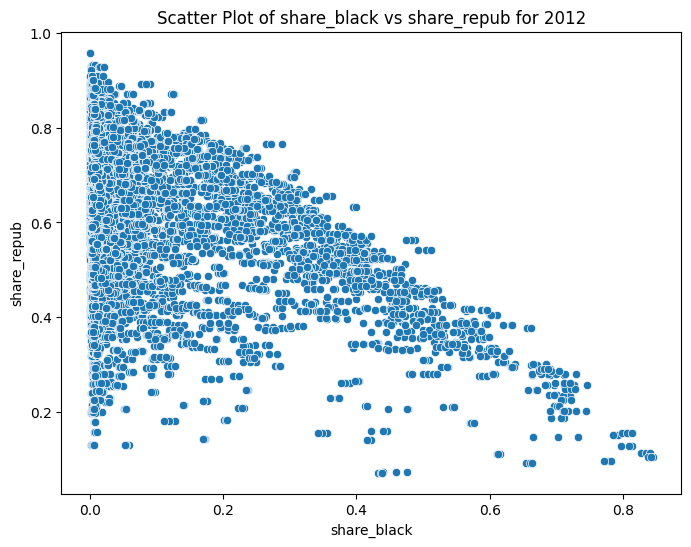

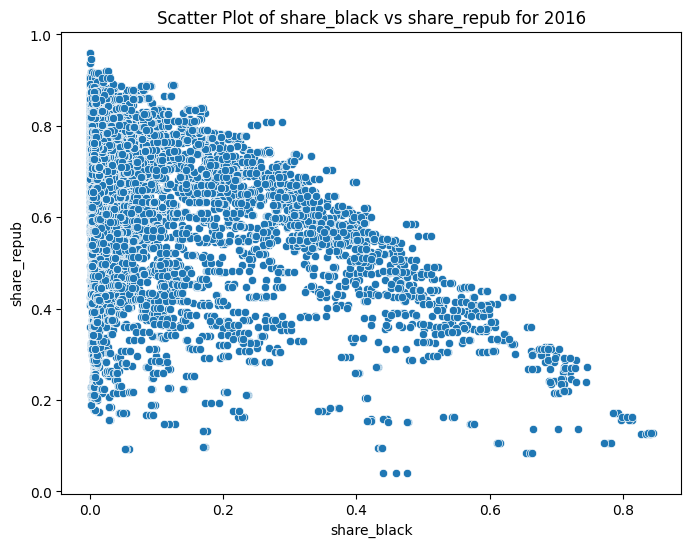

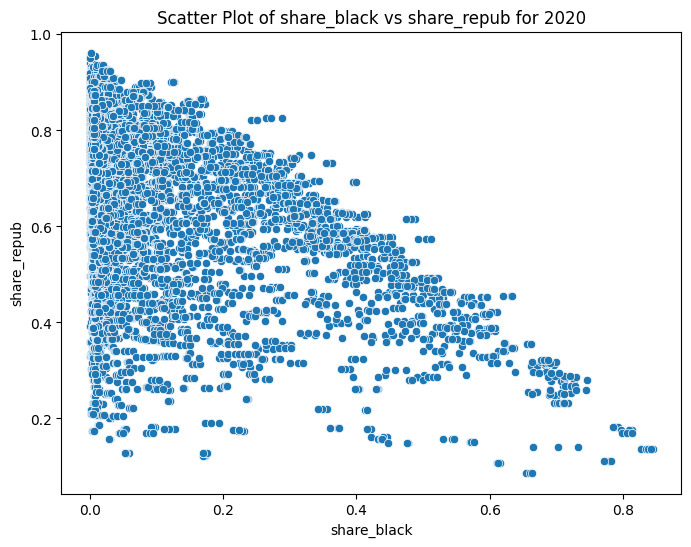

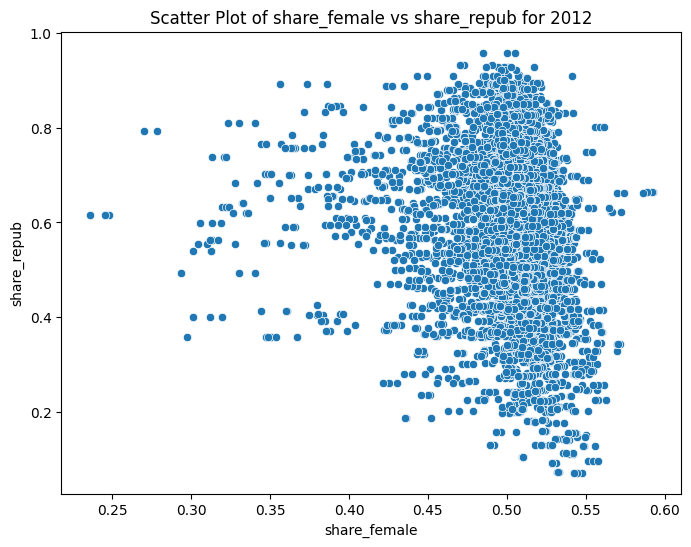

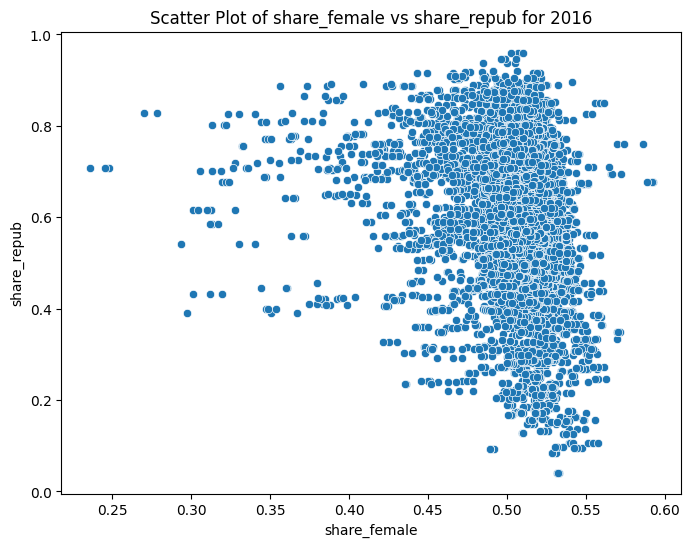

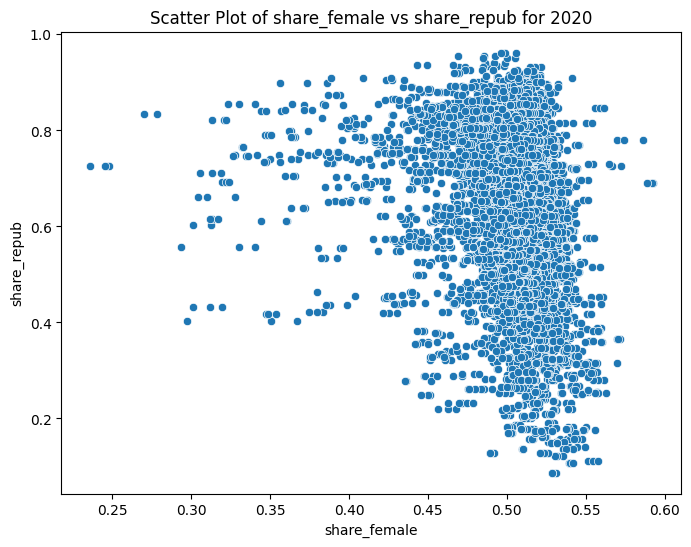

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_merged is your dataset with the new columns and a 'year' column
demographic_vars = ['share_black', 'share_female']

# Get unique years in your dataset
years = df_merged['year_y'].unique()

# Create scatter plots for each demographic variable for each year
for var in demographic_vars:
    for year in years:
        plt.figure(figsize=(8, 6))
        # Filter data for the specific year
        df_year = df_merged[df_merged['year_y'] == year]
        sns.scatterplot(x=df_year[var], y=df_year['share_repub'])
        plt.title(f'Scatter Plot of {var} vs share_repub for {year}')
        plt.xlabel(var)
        plt.ylabel('share_repub')
        plt.show()

When the population of black people increases the shares of republican votes go down.

There is a slight correlation of when female population goes up the share of republican votes go down.

In [16]:
import pandas as pd

# Assuming df is your original dataset
# Collapse (aggregate) by state and year, summing the relevant variables
aggregated_df = df_merged.groupby(['state_y', 'year_y']).agg({
    'repub': 'sum',
    'democ': 'sum',
    'totalvotes': 'sum',
    'total_population': 'sum',
'total_black': 'sum',
    'total_white': 'sum',
    'female': 'sum'
}).reset_index()

# Step 2: Create new fraction variables
# Fraction of each demographic group
aggregated_df['share_black'] = aggregated_df['total_black'] / aggregated_df['total_population']
aggregated_df['share_white'] = aggregated_df['total_white'] / aggregated_df['total_population']
aggregated_df['share_female'] = aggregated_df['female'] / aggregated_df['total_population']

# Share of total votes cast for each party
aggregated_df['share_repub'] = aggregated_df['repub'] / aggregated_df['totalvotes']
aggregated_df['share_democ'] = aggregated_df['democ'] / aggregated_df['totalvotes']

# Output the final aggregated dataframe
print(aggregated_df.head())


   state_y  year_y    repub    democ  totalvotes  total_population  \
0  ALABAMA    2012  3767775  2387088   6211059.0          10851291   
1  ALABAMA    2016  3954750  2188641   6370101.0          10851291   
2  ALABAMA    2020  4323510  2548872   6969846.0          10851291   
3   ALASKA    2012    31494    28557     62556.0            665086   
4   ALASKA    2016    28254    27387     63327.0            665086   

   total_black  total_white   female  share_black  share_white  share_female  \
0      2761042      7744000  5688817     0.254444     0.713648      0.524253   
1      2761042      7744000  5688817     0.254444     0.713648      0.524253   
2      2761042      7744000  5688817     0.254444     0.713648      0.524253   
3        39004       457605   323515     0.058645     0.688039      0.486426   
4        39004       457605   323515     0.058645     0.688039      0.486426   

   share_repub  share_democ  
0     0.606624     0.384329  
1     0.620830     0.343580  
2     0.

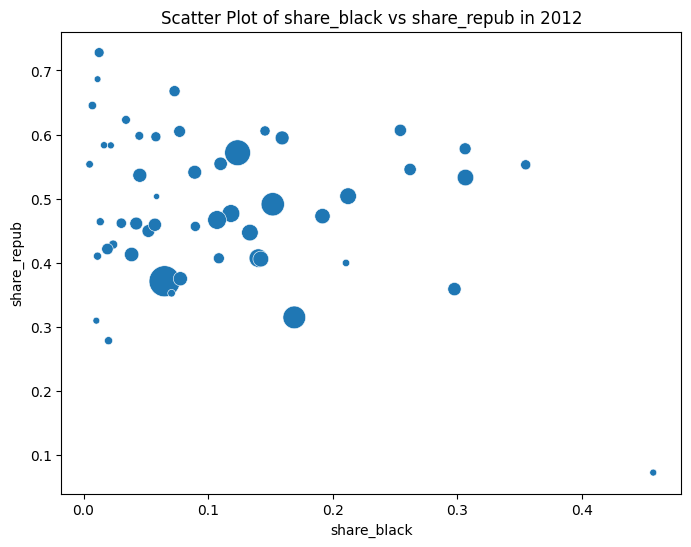

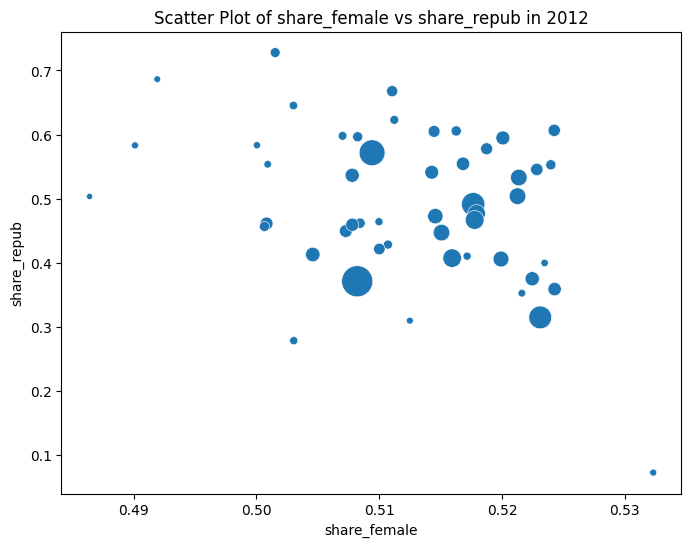

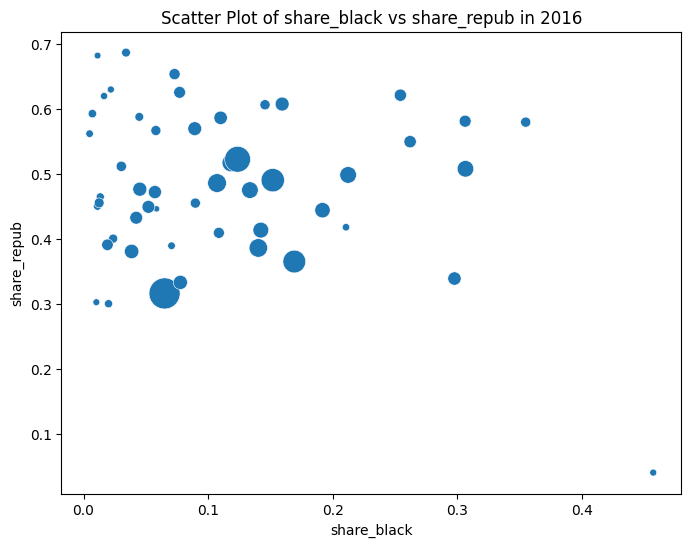

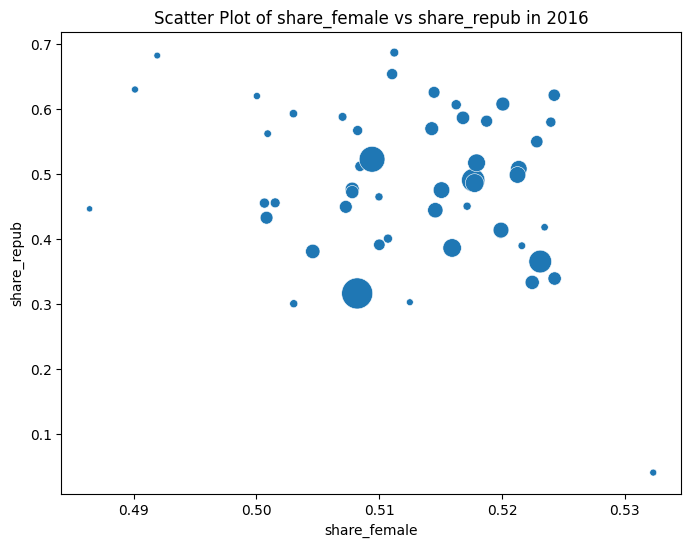

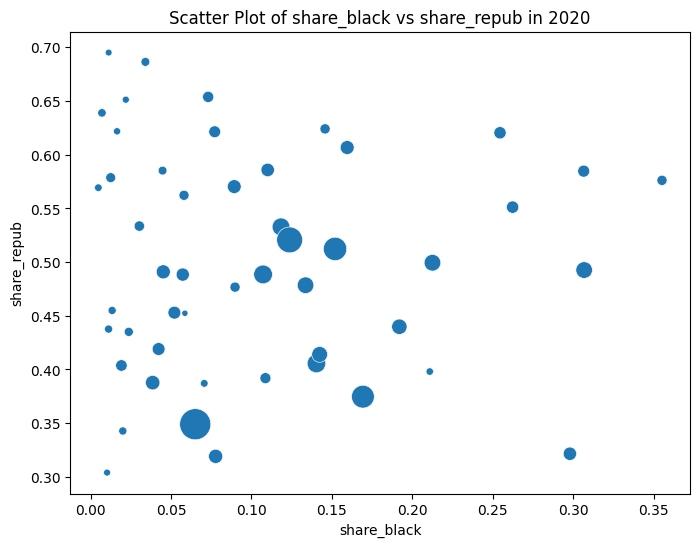

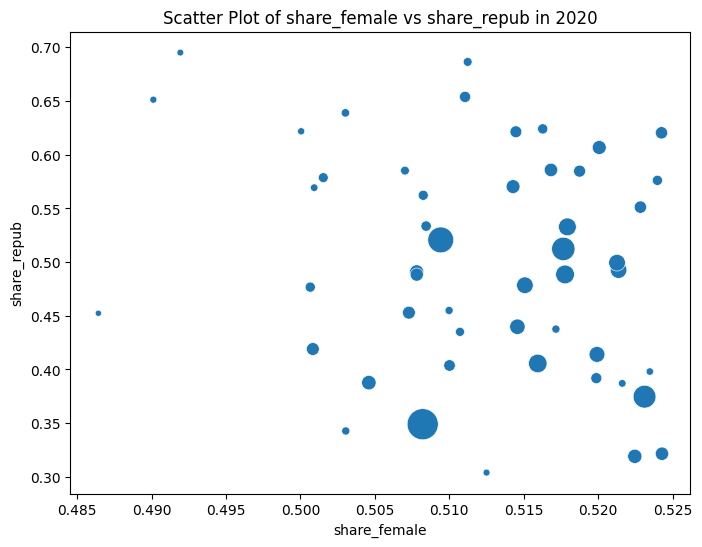

In [17]:

# List of demographic share variables to plot against share_repub
demographic_vars = ['share_black', 'share_female']

# Create scatter plots for each year
years = aggregated_df['year_y'].unique()  # Get unique years

for year in years:
    yearly_data = aggregated_df[aggregated_df['year_y'] == year]  # Filter data by year

    for var in demographic_vars:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=yearly_data[var], y=yearly_data['share_repub'],
                        size=yearly_data['total_population'], sizes=(20, 500), legend=False)

        plt.title(f'Scatter Plot of {var} vs share_repub in {year}')
        plt.xlabel(var)
        plt.ylabel('share_repub')
        plt.show()


There is a slight negative correlation between the increasing share of black people and the share of Republican voters.

There is a negative correlation between the increasing share of females and the share of republican voters.

In [18]:
# make regressions on the variables from the scatter plot
# X = aggregated_df['share_black']
# y = aggregated_df['share_repub']

# make regression with the variables above
import statsmodels.formula.api as sm

 # Define the model
model = sm.ols('share_repub ~ share_black', data=aggregated_df)

results = model.fit()

print(results.summary())



                            OLS Regression Results                            
Dep. Variable:            share_repub   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     4.431
Date:                Fri, 20 Sep 2024   Prob (F-statistic):             0.0370
Time:                        23:38:17   Log-Likelihood:                 117.55
No. Observations:                 152   AIC:                            -231.1
Df Residuals:                     150   BIC:                            -225.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5115      0.014     37.831      

In [19]:
model = sm.ols('share_repub ~ share_female', data=aggregated_df)

results = model.fit()
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.086    
Dependent Variable: share_repub      AIC:                -241.3516
Date:               2024-09-20 23:38 BIC:                -235.3039
No. Observations:   152              Log-Likelihood:     122.68   
Df Model:           1                F-statistic:        15.21    
Df Residuals:       150              Prob (F-statistic): 0.000145 
R-squared:          0.092            Scale:              0.011810 
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       2.3734    0.4828   4.9157  0.0000   1.4194   3.3274
share_female   -3.6758    0.9424  -3.9004  0.0001  -5.5379  -1.8137
------------------------------------------------------------------
Omnibus:              5.931         Durbin-Watson:           0.777
Prob(Omn